In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate 
import scipy.integrate
import scipy.constants
import scipy.stats
from scipy.ndimage import gaussian_filter

In [2]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 14})
plw = 0.8
pcs = 3
pms = 2.5
bfillc = [0.9,0.9,0.9]

plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5

In [3]:
# Constants
NA = scipy.constants.Avogadro
kB = scipy.constants.Boltzmann
pi = scipy.constants.pi
e = scipy.constants.e

In [4]:
# Supersaturation 
S = [0.54, 0.81, 1.09, 1.39, 1.66, 1.93, 2.2, 2.42, 2.71, 3.01, 3.38, 3.7, 4.05, 4.34]
# Molality
B = [1.0, 2.0, 3.0, 4.0, 5.1, 6.1, 7.1, 8.1, 9.0, 10.0, 11.1, 12.5, 13.7, 15.0, 16.0]
# Length x
lx = np.array([4.97804, 5.00675, 5.05162, 5.08246, 4.83291, 4.63053, 4.46522, 4.34648, 4.23125, 4.12126, 3.99603, 3.91844, 3.83475, 3.78248])
# Nions
Ni = np.array([74, 145, 215, 290, 370, 370, 370, 370, 370, 370, 370, 370, 370, 370])
# Molarity
M = Ni/NA / lx**3*1E24

nrns = len(S)

In [5]:
# Infinite dillution: 1NaCl in 4000 water molecules
inflx = 4.92952
infNi = 1
infM = infNi/NA / inflx**3*1E24 

In [6]:
# Self-diffusion correction
T = 298.15
lx = lx*1E-9
pref = 2.837297
visc = 0.000729 

In [7]:
# Diffusion coefficients
NAraw = np.loadtxt("NA-D.dat")    
CLraw = np.loadtxt("CL-D.dat")    
NAD = np.zeros(nrns)
CLD = np.zeros(nrns)
NAsd = np.zeros(nrns)
CLsd = np.zeros(nrns)

for i in range(0,nrns,1):    
    Dcorr = 1E9*(kB*T*pref)/(6*pi*visc*lx[i])
    
    NAD[i] = NAraw[i,2] + Dcorr
    CLD[i] = CLraw[i,2] + Dcorr
    
    NAsd[i] = NAraw[i,3] 
    CLsd[i] = CLraw[i,3]     


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


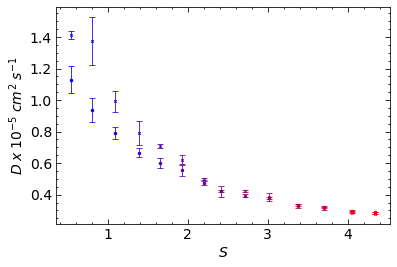

In [8]:
# Plot Na, Cl D as a function of S

plt.figure()
plt.xlabel("$S$")
plt.ylabel("$D\; x \; 10^{-5}\; cm^2\; s^{-1}$")

c = 0
for i in range(0,nrns,1):
    cols=[c/nrns,0.0,1-c/nrns]
    
    plt.plot(S[i],NAD[i],'o',color=cols,markersize=pms)
    plt.errorbar(S[i],NAD[i],yerr=NAsd[i],ls='none',color=cols, capsize=pcs, elinewidth=plw, markeredgewidth=plw)    

    plt.plot(S[i],CLD[i],'x',color=cols,markersize=pms)
    plt.errorbar(S[i],CLD[i],yerr=CLsd[i],ls='none',color=cols, capsize=pcs, elinewidth=plw, markeredgewidth=plw)    

    c += 1 
plt.show()

In [9]:
# Polynomial fitting (M)
x = np.linspace(0.8, 12, 100)
NAplynml = np.poly1d(np.polyfit(M, NAD, 2))
CLplynml = np.poly1d(np.polyfit(M, CLD, 2))

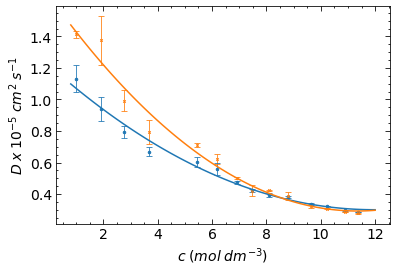

In [10]:
# Plot Na, Cl D as a function of M

plt.figure()
plt.xlabel("$c\; (mol\; dm^{-3})$")
plt.ylabel("$D\; x \; 10^{-5}\; cm^2\; s^{-1}$")

for i in range(0,nrns,1):
    
    plt.plot(M[i],NAD[i],'o',color='C0',markersize=pms)
    plt.errorbar(M[i],NAD[i],yerr=NAsd[i],ls='none',color='C0', capsize=pcs, elinewidth=plw, markeredgewidth=plw)    

    plt.plot(M[i],CLD[i],'x',color='C1',markersize=pms)
    plt.errorbar(M[i],CLD[i],yerr=CLsd[i],ls='none',color='C1', capsize=pcs, elinewidth=plw, markeredgewidth=plw)    


plt.plot(x,NAplynml(x))
plt.plot(x,CLplynml(x))
plt.show()

In [11]:
# Limit for D at infinite dilution; see Section 5.3 in https://doi.org/10.1016/j.cherd.2022.02.018
infNAD = 1.223*1E-9
infCLD = 1.282*1E-9
infNAsd = 0.005*1E-9
infCLsd = 0.008*1E-9

In [12]:
# Scale the diffusion coefficients for SI units
NAD *= 1E-9
CLD *= 1E-9
NAsd *= 1E-9
CLsd *= 1E-19

No handles with labels found to put in legend.


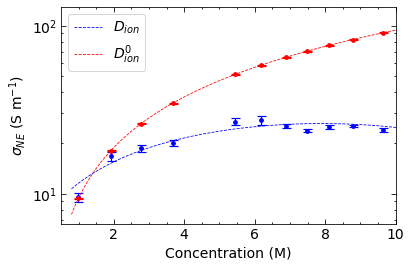

In [20]:
# Conductivity
S = np.zeros(nrns)
infS = np.zeros(nrns)

plt.figure()
plt.yscale("log")
plt.xlim(0.5,10)
plt.legend(loc="upper left")

plt.xlabel("Concentration (M)")
plt.ylabel("$\sigma_{NE}$ (S m$^{-1})$")
for i in range(0,nrns,1):
    S[i] = e*e*(Ni[i]*NAD[i]+Ni[i]*CLD[i])/ (lx[i]**3* kB*T)
    Serror = (e*e*(Ni[i]+Ni[i])/(lx[i]**3* kB*T)) * np.sqrt(NAsd[i]**2 + CLsd[i]**2)
    
    plt.plot(M[i],S[i],'o',color='b',markersize=pms*1.5)
    plt.errorbar(M[i],S[i],yerr=Serror,ls='none',color='b', capsize=pcs*1.5, elinewidth=plw*1.5, markeredgewidth=plw*1.5)    

    infS[i] = e*e*(Ni[i]*infNAD+Ni[i]*infCLD)/ (lx[i]**3* kB*T)
    infSerror = (e*e*(Ni[i]+Ni[i])/(lx[i]**3* kB*T)) * np.sqrt(infNAsd**2 + infCLsd**2)
        
    plt.plot(M[i],infS[i],'o',color='r',markersize=pms*1.5)
    plt.errorbar(M[i],infS[i],yerr=infSerror,ls='none',color='r', capsize=pcs*1.5, elinewidth=plw*1.5, markeredgewidth=plw*1.5)    

    
Splynml = np.poly1d(np.polyfit(M, S, 2))
infSplynml = np.poly1d(np.polyfit(M, infS, 2))
plt.plot(x,Splynml(x),'b--',linewidth=plw, label="$D_{ion}$")
plt.plot(x,infSplynml(x),'r--',linewidth=plw, label="$D_{ion}^0$")

plt.legend(loc="upper left")
plt.savefig('conductivity.png',dpi=300)
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


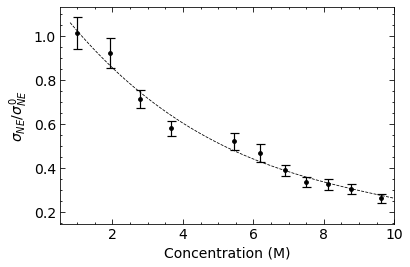

In [31]:
plt.figure()
#plt.yscale("log")
plt.xlim(0.5,10)
plt.legend(loc="upper left")

plt.xlabel("Concentration (M)")
plt.ylabel("$\sigma_{NE}/\sigma_{NE}^0$")
for i in range(0,nrns,1):
    S[i] = e*e*(Ni[i]*NAD[i]+Ni[i]*CLD[i])/ (lx[i]**3* kB*T)
    Serror = (e*e*(Ni[i]+Ni[i])/(lx[i]**3* kB*T)) * np.sqrt(NAsd[i]**2 + CLsd[i]**2)

    infS[i] = e*e*(Ni[i]*infNAD+Ni[i]*infCLD)/ (lx[i]**3* kB*T)
    infSerror = (e*e*(Ni[i]+Ni[i])/(lx[i]**3* kB*T)) * np.sqrt(infNAsd**2 + infCLsd**2)
    
    error = np.sqrt((Serror/S[i])**2 + (infSerror**2/infS[i]))
        
    plt.plot(M[i],S[i]/infS[i],'o',color='k',markersize=pms*1.5)
    plt.errorbar(M[i],S[i]/infS[i],yerr=error*S[i]/infS[i],ls='none',color='k', capsize=pcs*1.5, elinewidth=plw*1.5, markeredgewidth=plw*1.5)    

    
Splynml = np.poly1d(np.polyfit(M, S/infS, 3))
#infSplynml = np.poly1d(np.polyfit(M, infS, 2))
plt.plot(x,Splynml(x),'k--',linewidth=plw)
#plt.plot(x,infSplynml(x),'r--',linewidth=plw, label="$D_{ion}^0$")

plt.legend().remove()
plt.savefig('conductivity_ratio.png',dpi=300)
plt.show()